Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Pre-Processing

In [3]:
gold_data = pd.read_csv('/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1. Positive Correlation
  2. Negative Correlation

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

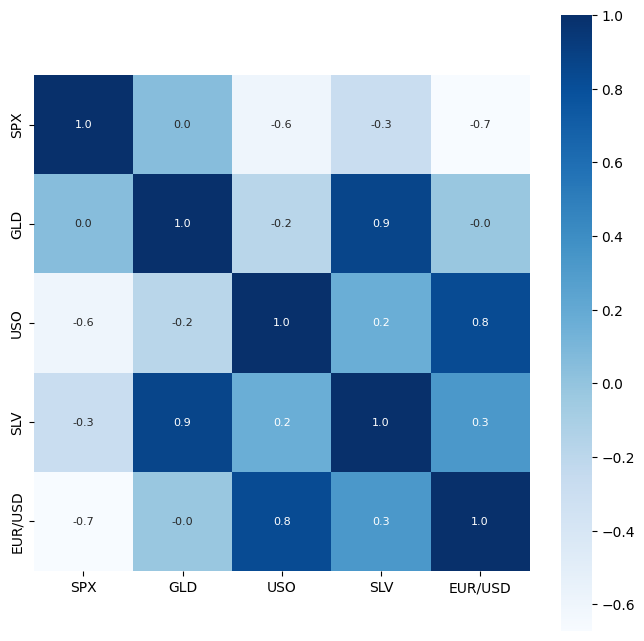

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-dbea7e84cd97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

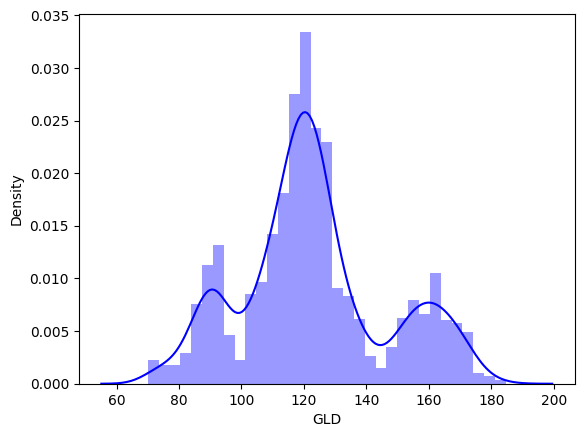

In [18]:
sns.distplot(gold_data['GLD'], color='blue')

Splitting the Features and Target

In [20]:
x = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [21]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [27]:
test_data_prediction = regressor.predict(x_test)

In [28]:
print(test_data_prediction)

[168.43699907  82.0455998  116.16799994 127.67450063 120.5347018
 154.9686981  150.22219829 126.08430035 117.47989864 125.88790086
 116.79860116 172.00190062 141.41059882 167.86629824 115.35630016
 117.15950057 138.47290251 170.18370062 159.35080355 158.09069907
 155.12660032 125.01780018 177.21449943 157.4422034  125.28400036
  93.66699968  76.91540017 120.70560021 119.07229938 167.52979908
  88.20150064 125.09780021  90.95710065 117.78470015 121.10769893
 136.40810111 115.59230111 114.86140093 146.46749911 107.44320095
 104.61420242  87.31739801 126.45400028 117.96710033 153.94339843
 119.68290029 108.36279982 108.04249818  93.05189995 127.04489789
  75.7097001  113.69779942 121.41960032 111.1653993  118.8742987
 120.47269966 159.81659982 166.84060087 146.90589673  85.79439862
  94.6274002   86.70089878  90.47770018 119.1168006  126.40100104
 127.67989997 169.37979993 122.23989907 117.53989898  98.44130015
 167.78390099 142.86939764 132.34980275 121.20470212 121.05769962
 119.9380003

In [30]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.9893918977733616


Compare the Actual Values and Predicted Values in a plot

In [31]:
y_test = list(y_test)

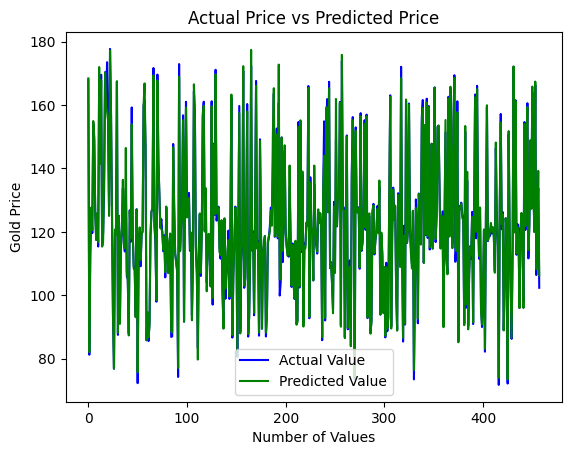

In [36]:
plt.plot(y_test, color='blue', label = "Actual Value")
plt.plot(test_data_prediction, color='green', label="Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()